Example represent data and ANN structure provided in **38-42 slides** of Introduction lesson

In [2]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
# predict function, which represent NN 
def predict(X, W):
  N4 =  X[0] * W[0] +   X[1] * W[2] + X[2] * W[4];
  N5 =  X[0] * W[1] +   X[1] * W[3] + X[2] * W[5];
  y =  N4 * W[6] + N5 * W[7];
  return y

In [4]:
# evaluating NN
def target(data, y, W):
    err = 0;
    for i in range(0,len(y)):
        yy = predict(data[i,:] ,W);
        err = err + abs(y[i] - yy);
    return err

In [5]:
def quasiGrad(data, y, Wmod, i, currTarget):
    h = 0.0001;
    Wmod[i] = Wmod[i] + h;
    grad = (target(data, y, Wmod) - currTarget) / h;    
    return grad


0.7432000000000001
[ 1.04700287  0.35269691  0.74581675 -0.27341096 -0.19822946  0.30418954
 -0.01350228  0.22083162]


Text(0.5, 1.0, 'Artifitial Neural Network')

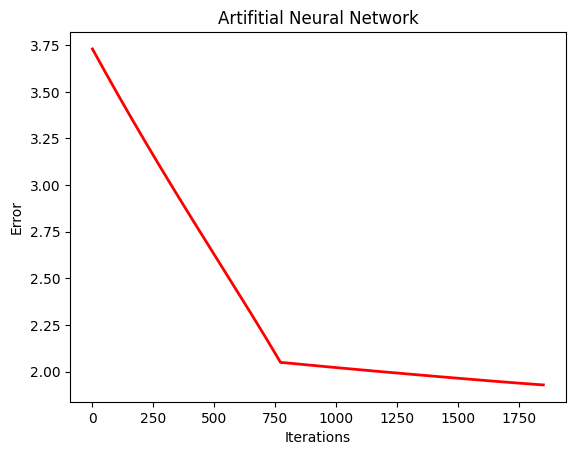

In [6]:
# example, to obtain NN (41-42 introduction slide)
# coeficient using gradient descent (back propogation)

# vector to predict value
X = np.array([0.22, 0.3, 0.9]); # value vector

# initial NN weights (as vector, relation between different neurons)
# N1 -> N4; N1 -> N5;
# N2 -> N4; N2 -> N5;
# N3 -> N4; N3 -> N5;
# N4 -> N6; N5 -> N6;
W = [1, 0.5,    1, 0.1,     0.01, 0.2,   0.8, 1];

# Y prediction of with x
y = predict(X, W)

print(y)
# all dataset (X vectors)
data = np.array([[0.22, 0.3, 0.9],
                 [0.56, 0.8, 0.3],
                 [0.14, 0.4,0.66],
                 [0.78, 0.67, 0.12]]);
# known dataset values (y vector)
y = np.array([1, 0, 1, 0]);

# total error
errBef = target(data,y,W)

# array to save how total error changes in optimization step
errors =[errBef];
step = 0.002;
# optimizing NN weights 
while (step > 0.0001):
    g = np.zeros_like(W); # initial gradients is equal zero obtaining
    #  gradient for each weights (numerical partial derrivative)
    for i in range(0,len(W)):
        g[i] = quasiGrad(data, y, W, i, errBef);

    # normalizing gradient
    g = g / np.linalg.norm(g);
    W = W - step * g;
    err = target(data,y,W);
    # if error starts growing
    if (errBef < err):
       # restoring weights 
       W = W + step * g;
       # taking smaller gradient step
       step = step / 2; 
    else:
       errBef = err;
    # storing optimization results
    errors.append(err);


# new weights
print(W)


plt.plot(np.arange(0, len(errors)), errors, 'r', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Artifitial Neural Network')

TODO: apply provided example on continuosDataExample.tsv dataset

240984026.91199958
215188666.58002523
1
181755137.88204056
1
142816634.4112261
1
104227477.9269403
1
87967447.21703312
1
106885783.25810659
0.5
92504660.04778273
0.25
88697935.90944953
0.125
87897349.4904483
0.125
87650200.5878137
0.125
87875329.78270744
0.0625
87650194.57950084
0.0625
87499286.7667637
0.0625
87418882.25106215
0.0625
87257328.56419851
0.0625
87188943.76598257
0.0625
87020657.5544813
0.0625
86936739.58112167
0.0625
86771229.9602179
0.0625
86727357.94844419
0.0625
86544060.3463256
0.0625
86438160.29483174
0.0625
86270254.14039822
0.0625
86176743.36018305
0.0625
86002675.78784966
0.0625
85983294.91183318
0.0625
85785019.18970196
0.0625
85718690.30944628
0.0625
85533462.76498334
0.0625
85533340.2430339
0.0625
85317566.3047123
0.0625
85301014.56294057
0.0625
85080192.70394827
0.0625
85049427.19094066
0.0625
84831349.82444575
0.0625
84801457.27994956
0.0625
84580847.75154674
0.0625
84513841.56236278
0.0625
84314763.91063464
0.0625
84296640.19368023
0.0625
84077113.50834897
0

Text(0.5, 1.0, 'Artifitial Neural Network')

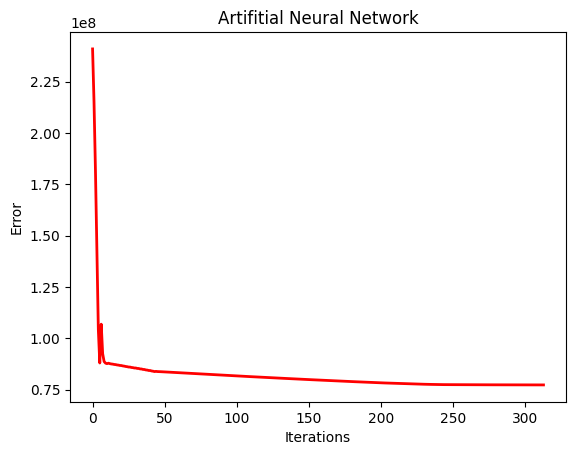

In [7]:
import numpy as np

W = [1, 0.5,    1, 0.1,     0.01, 0.2,   0.8, 1];

tsvFile = "../data/continuosDataExample.tsv"
myData = np.genfromtxt(tsvFile, delimiter="\t", skip_header=1)

data = np.array([row[0:3]for row in myData])
y = [i[3] for i in myData]

errBef = target(data,y,W)

print(errBef)

# array to save how total error changes in optimization step
errors =[errBef];
step = 1;
# optimizing NN weights 
while (step > 0.001):
    g = np.zeros_like(W); # initial gradients is equal zero obtaining
    #  gradient for each weights (numerical partial derrivative)
    for i in range(0,len(W)):
        g[i] = quasiGrad(data, y, W, i, errBef);

    # normalizing gradient
    g = g / np.linalg.norm(g);
    W = W - step * g;
    err = target(data,y,W);
    # if error starts growing
    if (errBef < err):
       # restoring weights 
       W = W + step * g;
       # taking smaller gradient step
       step = step / 2; 
    else:
       errBef = err;
    print(err)
    print(step)
    # storing optimization results
    errors.append(err);


# new weights
print(W)


plt.plot(np.arange(0, len(errors)), errors, 'r', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Artifitial Neural Network')


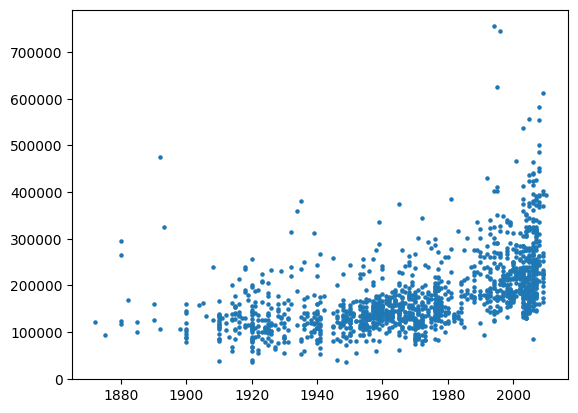

In [17]:
x = [i[1] for i in data]

fig = plt.figure()
ax = fig.gca()
ax.scatter(x, y, s = 5)

yy = [predict(i, W) for i in data]

